In [4]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/elsevier/Bert-NER'
%cd $path
import utils_annotate
import utils_train as ut
import os
!pip install highlight-text
import matplotlib.pyplot as plt
from highlight_text import HighlightText

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/elsevier/Bert-NER


In [2]:
data_all = utils_annotate.load_json('src_data/2024-02-14_sciencedirect_machine+learning+interatomic+potential_120.json')
data_all = [d for d in data_all if d['abstract'] != None]
print(f"Number of entries: {len(data_all)}")
print(len(os.listdir('individual_ner')))
os.listdir('individual_ner')

Number of entries: 102
32


['10.1016j.flatc.2022.100347.json',
 '10.1016j.apmt.2020.100685.json',
 '10.1016j.carbon.2021.10.059.json',
 '10.1016j.cpc.2020.107583.json',
 '10.1016j.jnucmat.2023.154794.json',
 '10.1016j.commatsci.2023.112388.json',
 '10.1016j.cartre.2023.100260.json',
 '10.1016j.jallcom.2023.169964.json',
 '10.1016j.commatsci.2023.112526.json',
 '10.1016j.ssi.2023.116358.json',
 '10.1016j.apmt.2023.101951.json',
 '10.1016j.commatsci.2022.111970.json',
 '10.1016j.commatsci.2023.112656.json',
 '10.1016j.commatsci.2022.111330.json',
 '10.1016j.tsf.2021.138927.json',
 '10.1016j.ijheatmasstransfer.2022.122859.json',
 '10.1016j.cpc.2021.108218.json',
 '10.1016j.commatsci.2021.110364.json',
 '10.1016j.commatsci.2023.112376.json',
 '10.1016j.flatc.2022.100446.json',
 '10.1016j.commatsci.2021.110960.json',
 '10.1016j.commatsci.2019.109333.json',
 '10.1016j.commatsci.2023.112655.json',
 '10.1016j.commatsci.2023.112723.json',
 '10.1016j.cpc.2023.108920.json',
 '10.1016j.ssi.2023.116298.json',
 '10.1016j.ijhe

In [3]:
index = 32
name = data_all[index]['prism:doi'].replace('/', '')
print(name)
word_list, categories = utils_annotate.annotate(data_all[index]['abstract'],
 ['O', 'MATERIAL', 'MLIP', 'PROPERTY', 'SIMULATION', 'VALUE', 'APPL'], name)

10.1016j.commatsci.2023.112715
Over the past decade, machine learning interatomic potentials (MLIPs) have advanced many areas of computational materials science and chemistry. In metallurgy, however, substantial work remains to be done when computing critical mechanical properties of metals (e.g., strength, ductility, hardness, etc.). This is due to three distinct characteristics of metals that are, in this combined form, not necessarily relevant for predicting other properties (e.g., elastic constants). First, metals are inherently multiscale and, so, simulating realistic microstructures may require millions of atoms. On the other hand, to be predictive, MLIPs must be trained on quantum-mechanical simulations that are limited to a few hundred atoms, which raises the question of transferability to larger systems. Second, there are quantum-mechanical effects, such as magnetism, that are not yet to full extent accounted for in the functional form of state-of-the-art MLIPs. Third, the sea

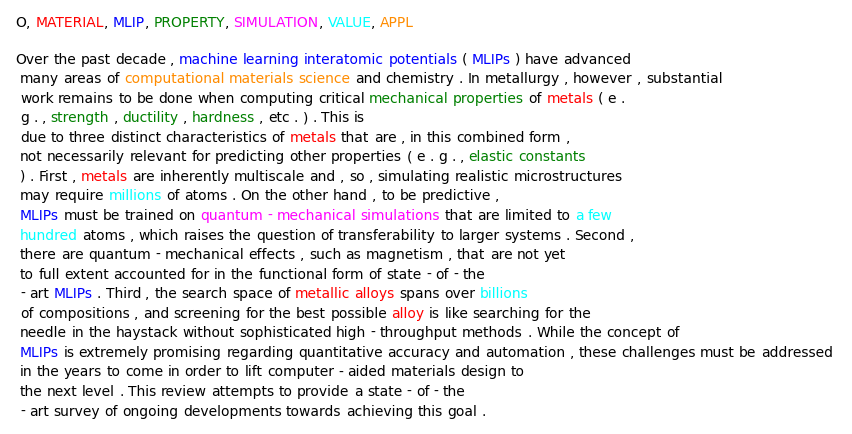

In [7]:
colors = {'O': 'black', 'MATERIAL': 'red', 'MLIP': 'blue', 'PROPERTY': 'green',
          'SIMULATION': 'magenta', 'VALUE': 'cyan', 'APPL': 'darkorange'}
word_list_marked = ['<' + w + '>' for w in word_list]
markers = [{"color": colors[i]} for i in categories]
j = 0
for i in range(len(word_list)):
    if (i + 1) % 15 == 0:
        word_list_marked.insert(i + j, '\n')
        j += 1
fig, ax = plt.subplots()
ax.set_axis_off()
HighlightText(x=0., y=1, s='<O>, <MATERIAL>, <MLIP>, <PROPERTY>, <SIMULATION>, <VALUE>, <APPL>',
              highlight_textprops=[{"color": c} for c in list(colors.values())], ax=ax)
HighlightText(x=0., y=0.9, s=' '.join(word_list_marked),
              highlight_textprops=markers, ax=ax)
plt.show()

In [ ]:
data = utils_annotate.combine_records('individual_ner')
SEED = 1421
ut.seed_everything(SEED)
utils_annotate.json_train_test('train_test_data', data, 3, shuffle=True)